In [1]:
"""
Learning XOR
Teng Li
05.Jul.2020
"""

'\nLearning XOR\nTeng Li\n05.Jul.2020\n'

### Learning XOR
the XOR function is defined as
\begin{equation}
    x_1 \oplus x_2 =
    \begin{cases}
         0 \quad x_1 = x_2  \\
         1 \quad x_1 \neq x_2  \\
    \end{cases}.
\end{equation}


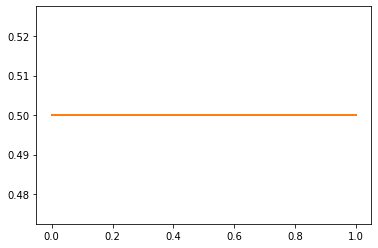

In [3]:
'''
In this task I want to use 'scikit-learn' to train a linear classifier to learn XOR,
which is not linearly separable.
'''

import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y = np.asarray([[0],[1],[1],[0]])

LR_model = LinearRegression()
LR_model.fit(X,Y)

#pyplot.figure()
pyplot.plot(X,LR_model.predict(X))
pyplot.show()

We can find LR didn't work well in this task.<br>
So now I will use MLP to learn XOR, but only ***numpy*** will be used.

In [7]:
#define the learning rate and weights
lr = 1
W1 = np.random.rand(2, 2) - 0.5
W2 = np.random.rand(2, 1) - 0.5
B1 = np.random.rand(1, 2) - 0.5
B2 = np.random.rand(1, 1) - 0.5

#define some function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(x):
    h1 = sigmoid(x @ W1 + B1)
    y_hat = sigmoid(h1 @ W2 + B2)
    return h1,y_hat

def l2_loss(y, y_hat):
    return (y - y_hat) ** 2 / 2

def loss_deriv(y, y_hat):
    return y_hat - y

def sigmoid_deriv(s):
    return (1 - s) * s

def backward(x, y):
    global W1, W2, B1, B2
    h1, y_hat = forward(x)

    dl = loss_deriv(y, y_hat)
    dz2 = dl * sigmoid_deriv(y_hat)
    db2 = dz2
    dw2 = h1.T * dz2
    
    dh1 = dz2 * W2.T
    dz1 = dh1 * sigmoid_deriv(h1)
    dw1 = x.T * dz1
    db1 = dz1
    
    W2 -= lr * dw2
    W1 -= lr * dw1
    B2 -= lr * db2
    B1 -= lr * db1

In [8]:
# Training
EPOCHS = 10000
for _ in range(EPOCHS):
    for x, y in zip(X, Y):
        backward(x, y)
print('  x\t y\t   y_hat\t    loss')
print('--------------------------------------------')
for x, y in zip(X, Y):
    _, y_hat = forward(x)
    l = l2_loss(y, y_hat)
    print('{}\t{}\t{}\t{}'.format(x, y, y_hat, l))


  x	 y	   y_hat	    loss
--------------------------------------------
[0 0]	[0]	[[0.01105668]]	[[6.11250524e-05]]
[0 1]	[1]	[[0.98839817]]	[[6.73012187e-05]]
[1 0]	[1]	[[0.98839066]]	[[6.7388385e-05]]
[1 1]	[0]	[[0.01430913]]	[[0.00010238]]
